<a href="https://colab.research.google.com/github/JorgeZarama/DeepLearning/blob/main/07MIAR_VC04_VC05_Deep_Vision_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 07MAIR - Redes Neuronales y Deep Learning
## VC04_V05: Deep Learning y Deep vision

In [ ]:
# SOLO PARA USO EN GOOGLE COLABORATORY
# Para conectar el notebook con la cuenta de gdrive
from google.colab import drive
drive.mount('/content/drive/')

BASE_FOLDER = '/content/drive/My Drive/VIU/07_RN_MIAR/03.Materiales_del_profesor/' # Se debe garantizar que la carpeta docencia compartida se almacena en el directorio raíz de Google Drive. En caso contrario modificar este path

In [2]:
# Funciones base

import matplotlib.pyplot as plt
import numpy as np

def visualize_learning_curve(H):
  epochs = len(H.history["loss"])
  plt.style.use("ggplot")
  plt.figure()
  plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
  plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss")
  plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc")
  plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc")
  plt.title("Training Loss and Accuracy")
  plt.xlabel("Epoch #")
  plt.ylabel("Loss/Accuracy")
  plt.legend()

from sklearn.metrics import classification_report

def evaluate_model(model, x, y):
  print("[INFO]: Evaluando red neuronal...")
  predictions = convnet.predict(x_te, batch_size=128)
  print(classification_report(y_test, predictions.argmax(axis=1)))

## **INTRODUCCIÓN A LAS CONVOLUTIONAL NEURAL NETWORKS: MNIST DATASET**

#### **- Cargando el conjunto de datos**

In [3]:
# Cargar dataset de mnist
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(y_train.shape)


11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)


#### **- Acondicionando el conjunto de datos**

In [4]:
# Pre-procesado obligatorio cuando trabajo con redes neuronales
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.backend import expand_dims
import numpy as np


#Normalizar la intensidad de las Imágenes
x_tr, x_te = x_train/255, x_test/255
#particionar los datos trian/vluar Split
x_tr, x_val, y_tr, y_val = train_test_split(x_tr, y_train, test_size=0.1, random_state=42)
#Añadir canales en array
x_tr =np.expand_dims(x_tr, axis=3)
x_val =np.expand_dims(x_val, axis=3)
x_te =np.expand_dims(x_te, axis=3)

print(x_val.shape)


(6000, 28, 28, 1)


#### **- Creando la topología de Red Neuronal (CNN) y entrenándola**

In [5]:
# Construccion de una red CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

# Red feedforward API secuencial
convnet = Sequential()

# BASE MODEL

# BM Bloque 1

convnet.add(layers.Conv2D(32, (3,3), input_shape=(28,28,1), activation="relu", padding="same"))
convnet.add(layers.MaxPooling2D((2,2)))

# BM Bloque 2

convnet.add(layers.Conv2D(64, (3,3), activation="relu", padding="same"))
convnet.add(layers.MaxPooling2D((2,2)))

# BM Bloque 3

convnet.add(layers.Conv2D(64, (3,3), activation="relu", padding="same"))
convnet.add(layers.MaxPooling2D((2,2)))

# TOP MODEL
convnet.add(layers.Flatten())
convnet.add(layers.Dense(64, activation="relu"))
convnet.add(layers.Dense(10, activation="softmax"))



convnet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 3, 3, 64)          0

In [6]:
# Compilación
convnet.compile(optimizer="adam",
                loss="sparse_categorical_crossentropy", # Etiquetas categoricas
                #loss="categorical_crossentropy"         #Etiquetas one-hot.encoding (e.g [0,0,0,1])
                metrics=["accuracy"]
                )

In [7]:
# Entrenamiento

H = convnet.fit(x_tr, y_tr, epochs=5, batch_size=128, validation_data=(x_val, y_val))

Epoch 1/5
422/422 [==============================] - 13s 7ms/step - loss: 0.2554 - accuracy: 0.9236 - val_loss: 0.0651 - val_accuracy: 0.9818
Epoch 2/5
422/422 [==============================] - 2s 5ms/step - loss: 0.0608 - accuracy: 0.9811 - val_loss: 0.0463 - val_accuracy: 0.9868
Epoch 3/5
422/422 [==============================] - 2s 5ms/step - loss: 0.0426 - accuracy: 0.9866 - val_loss: 0.0385 - val_accuracy: 0.9898
Epoch 4/5
422/422 [==============================] - 3s 6ms/step - loss: 0.0314 - accuracy: 0.9899 - val_loss: 0.0373 - val_accuracy: 0.9898
Epoch 5/5
422/422 [==============================] - 3s 6ms/step - loss: 0.0265 - accuracy: 0.9915 - val_loss: 0.0392 - val_accuracy: 0.9878


#### **- Observando el proceso de entrenamiento para tomar decisiones**

[INFO]: Evaluando red neuronal...
79/79 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       1.00      0.98      0.99      1032
           3       1.00      0.99      0.99      1010
           4       0.99      1.00      1.00       982
           5       0.99      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.97      1.00      0.98       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



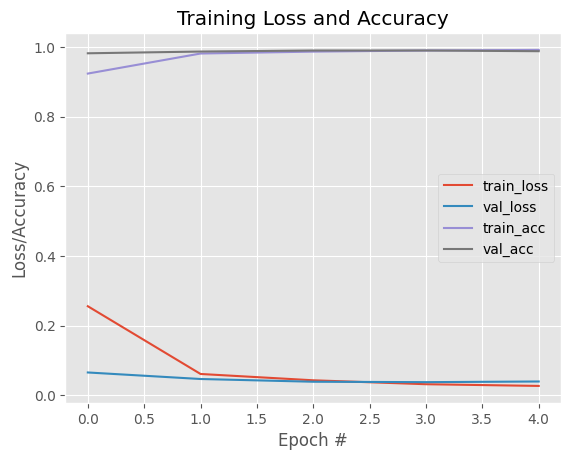

In [8]:
# Evaluación + Testeo

# Learning curves
visualize_learning_curve(H)

# Evaluando el modelo de predicción con las imágenes de test
evaluate_model(convnet, x_te, y_test)


## **¿POR QUE CONVOLUTIONAL NEURAL NETWORKS?: CIFAR DATASET**

#### **- Cargando el conjunto de datos y acondicionándolo**

In [ ]:
# Importando el set de datos CIFAR10


#### **- Inspeccionando el conjunto de datos**

In [ ]:
# Inspección del conjunto de datos

#### **- Creando la topología de red neuronal y entrenándola: MLP**

In [ ]:
# Arquitectura de red - modo API Sequential

# Compilamos el modelo y entrenamos

# Entrenamos el perceptrón multicapa

# Learning curves
visualize_learning_curve(...)

# Evaluando el modelo de predicción con las imágenes de test
evaluate_model(...)

#### **- Creando la topología de red neuronal y entrenándola: CNN**

In [ ]:
# Arquitectura de red - modo API Functional

# 1.BASE MODEL

# 2.TOP MODEL

# 3. Unimos las entradas y salidas del modelo

# Compilamos el modelo y entrenamos

# Entrenamos el perceptrón multicapa

# Learning curves
visualize_learning_curve(...)

# Evaluando el modelo de predicción con las imágenes de test
evaluate_model(...)

# Almaceno el modelo en Drive

## **REDUCIENDO OVERFITTING MEDIANTE DATA AUGMENTATION**

#### **- Acondicionando dataset**

In [ ]:
# Binarizar etiquetas - por si es necesario convertir a one-hot encoding


#### **- Creando un contenedor DataGenerator para el aumento automático de muestras**

In [ ]:
# Crear Image DataGenerator

#### **- Inspeccionando las muestras generadas sintéticamente**

In [ ]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline

sample = 45
plt.imshow(image.array_to_img(trainX[sample]))
plt.show()
print('Label = {}'.format(labelNames[trainY[sample].argmax(axis=0)]))

fig, axes = plt.subplots(2,2)
i = 0
for batch in datagen.flow(trainX[sample].reshape((1,32,32,3)),batch_size=1):
    #plt.figure(i)
    axes[i//2,i%2].imshow(image.array_to_img(batch[0]))
    i += 1
    if i == 4:
        break
plt.show()

#### **- Creando la topología de red neuronal y entrenándola: CNN**

In [ ]:
# Arquitectura de red - modo API Functional

# 1.BASE MODEL

# 2.TOP MODEL

# 3. Unimos las entradas y salidas del modelo

# Compilamos el modelo y entrenamos

# Entrenamos el perceptrón multicapa

# Learning curves
visualize_learning_curve(...)

# Evaluando el modelo de predicción con las imágenes de test
evaluate_model(...)

# Almaceno el modelo en Drive

**EJERCICIO PROPUESTO:** Modificar la ejecución con Data Augmentation para que sea directamente comparable a la ejecución por defecto. Para ello, el validation data debe ser correcto. Pista: Llevar a cabo el validation split cuando se instancia el objeto ImageDataGenerator. El método flow también se verá afectado (leer documentación).

## **TRABAJANDO CON REDES PRE-ENTRENADAS: TRANSFER LEARNING & FINE-TUNING**


#### **- Cargando el conjunto de datos y acondicionándolo como en la VGG**

In [ ]:
# Imports necesarios

# Importando y normalizando el set de datos CIFAR10

# One-hot encoding

# IMPORTANTE: Se normalizan los datos como se normalizaron en el entrenamiento con ImageNet!!


#### **- Cargando la topología de CNN (base model)**

In [ ]:
# keras incluye varias arquitecturas
# VGG16, VGG19, ResNet50, Xception, InceptionV3, InceptionResNetV2, MobileNetV2, DenseNet, RasNet
# documentacion https://keras.io/applications/
# Visual Geometry Group 16 / 19 (numero de layers)
# 1 y 2 en la competicion ImageNet 2014
# Kernels pequeños de 3x3

# Cargar arquitectura y pesos


#### **- Creando el top model y congelando TODAS las capas convolucionales (TRANSFER LEARNING)**

In [ ]:
# Conectar el modelo con el top model


#### **- Entrenando la solución**

In [ ]:
# Import the necessary packages

# Compilamos el modelo y entrenamos

# Entrenamos el perceptrón multicapa

# Learning curves
visualize_learning_curve(...)

# Evaluando el modelo de predicción con las imágenes de test
evaluate_model(...)

# Almaceno el modelo en Drive

#### **- Creando el top model y descongelando bloques convolucionales (FINE TUNING)**

In [ ]:
# Imports que vamos a necesitar

# Cargamos el dataset CIFAR10

# Normalizamos las entradas de idéntica forma a como lo hicieron para entrenar la VGG16 en imageNet

# Definimos dimensiones de nuestros datos de entrada y lista con las categorias de las clases

# En caso de inestabilidades numéricas pasar datos a one-hot encoding

# Importamos VGG16 con pesos de imagenet y sin top_model especificando tamaño de entrada de datos

# Mostramos la arquitectura

# Congelamos las capas de los 4 primeros bloques convolucionales, el quinto se re-entrena
# En base_model.layers.name tenemos la información del nombre de la capa

# Cogemos la última capa del model y le añadimos nuestro clasificador (top_model)

# Compilamos el modelo y entrenamos

# Entrenamos el perceptrón multicapa

# Learning curves
visualize_learning_curve(...)

# Evaluando el modelo de predicción con las imágenes de test
evaluate_model(...)

# Almaceno el modelo en Drive

**EJERCICIO PROPUESTO:** Combinar fine tuning con la técnica de data augmentation para reducir overfitting.

## **VISUALIZANDO POR DENTRO UNA CNN**

#### **- Visualizar activaciones intermedias**

- Visualizar el output de las capas de la red
- 2D imagen por canal

In [ ]:
%tensorflow_version 1.x
from tensorflow.keras.datasets import cifar10
from sklearn.preprocessing import LabelBinarizer

# Importando y normalizando el set de datos CIFAR10
print("[INFO]: Loading CIFAR-10 data...")
((trainX, trainY), (testX, testY)) = cifar10.load_data()
labelNames = ["Avión", "Automóvil", "Pájaro", "Gato", "Ciervo", "Perro", "Rana", "Caballo", "Barco", "Camión"]

#One-hot encoding
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

In [ ]:
from keras.models import load_model
model_augmentation = load_model(BASE_FOLDER+'resources/convnet_augmentation.h5')
model_augmentation.summary()

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import array_to_img
%matplotlib inline

# Visualizando imagen
sample = 1000
input_img = trainX[sample].reshape((1,32,32,3))
plt.imshow(array_to_img(trainX[sample]))
plt.show()

In [ ]:
# Modificar el modelo para que nos devuelva los mapas de activación


In [ ]:
# Visualización de la salida de un filtro - activacion, 32 canales, feature map de 30x30


In [ ]:
# Visualización de las activaciones en todas las capas



### Interpretacion
- Capas iniciales son como detectores de bordes
- Capas más profundas son más difíciles de interpretar (abstractas) y tienen información relativa a la clase de imagen
- La activación de capas profundas es más dispersa (sparse)

#### **- Visualizar filtros convolucionales**

- Visualizar las imagenes que maximizan la respuesta a un filtro

In [ ]:
from keras.applications import VGG16
from keras import backend as K

model = VGG16(weights='imagenet',include_top=False)
model.summary()

In [ ]:
import numpy as np

def gen_max_response_pattern(layer_name, filter_index, size=32):
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:,:,:,filter_index])

    # Para obtener el patron que responde de forma máxima, utilizamos descenso del gradiente
    grads = K.gradients(loss,model.input)[0] # Seleccionar el primero, ya que esto devuelve una lista
    # Normalización para ayudar al proceso del gradiente
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5) # Última constante para evitar dividir por 0
    # Definir funcion que calcula la pérdida y el gradiente de la imagen
    iterate = K.function([model.input], [loss,grads])
    loss_value, grads_value = iterate([np.zeros((1,size,size,3))])

    # Iniciamos con imagen aleatoria
    input_img_data = np.random.random((1,size,size,3)) * 20 + 128

    step = 1. # Magnitud de cada actualizacion en el gradiente
    n_steps = 40 # Número de iteraciones
    for i in range(n_steps):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
    img = input_img_data[0]
    # Procesar la imagen resultante
    img -= img.mean()
    img /= img.std() + 1e-5
    img *= 0.1
    img += 0.5
    img = np.clip(img,0,1)
    img *= 255
    img = np.clip(img,0,255).astype('uint8')

    return img

In [ ]:
# mostrar un patron para un filtro
import matplotlib.pyplot as plt
%matplotlib inline

layer_name = 'block2_conv1'
filter_index = 112 # canal a estudiar

img = gen_max_response_pattern(layer_name,filter_index,32)
plt.imshow(img)

**EJERCICIO PROPUESTO:** Mostrar los patrones de maxima activacion para todos los filtros de una capa.

#### **- Visualizar hetmaps de activación por clase**

- Útil para averiguar qué partes de la imagen contribuyen más a la decisión
- Interesante para saber qué pasa cuando se cometen errores

In [ ]:
# Técnica utiliza gradientes Ramprasaath, R. Selvaraju et al. (2017). https://arxiv.org/abs/1610.02391
from keras.applications import VGG16

model = VGG16(weights='imagenet',include_top=True)

In [ ]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

# Cargar imagen de gato
img = image.load_img(BASE_FOLDER+'resources/cat.jpg', target_size=(224,224))
x = image.img_to_array(img) # a array de (224,224,3)
x = np.expand_dims(x, axis=0) # a array de (1,224,224,3)
x = preprocess_input(x)

In [ ]:
# Testeando el output
prediction = model.predict(x)
print(decode_predictions(prediction))

In [ ]:
tabby_output_index = np.argmax(prediction[0])
tabby_output = model.output[:,tabby_output_index]
last_conv_layer = model.get_layer('block5_conv3')

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from keras import backend as K

grads = K.gradients(tabby_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0,1,2))
iterate = K.function( [model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])

# Multiplicar cada canal en el feature map por como de importante el canal es con respecto a la clase "tabby"
for i in range(512):
    conv_layer_output_value[:,:,i] *= pooled_grads_value[i]

heatmap = np.mean(conv_layer_output_value, axis=-1)

# Visualizar
heatmap = np.maximum(heatmap,0)
heatmap /= np.max(heatmap)
fig,axes = plt.subplots(1,2)
axes[0].matshow(heatmap)
axes[1].imshow(img)
plt.show()

**EJERCICIO PROPUESTO:** Obtener el heatmap para las otras clases en la lista de prediccion (Egyptian_cat, tiger_cat, etc.).